# Comparing Groups in a Practical Context

Our goal is to determine whether the users described in the desktop dataframe
and the users described in the laptop dataframe differ significantly from each
other

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

desktop = pd.read_csv('desktop.csv')
laptop = pd.read_csv('laptop.csv')

In [23]:
desktop.head()

,userid,spending,age,visits
0,1,1250,31,126
1,2,900,27,5
2,3,0,30,459
3,4,2890,22,18
4,5,1460,38,20


In [24]:
laptop.head()

,userid,spending,age,visits
0,31,1499,32,12
1,32,799,23,40
2,33,1200,45,22
3,34,0,59,126
4,35,1350,17,85


**userid** - contains a unique number identifying a particular user

**spending** - contains a record of how much that user has spent at your companies website

**age** - holds the users age

**visits** - holds the number of times the user has visited pages on your website

We can start with a plot of the amounts that subscribers to each list have spent on the company's products:

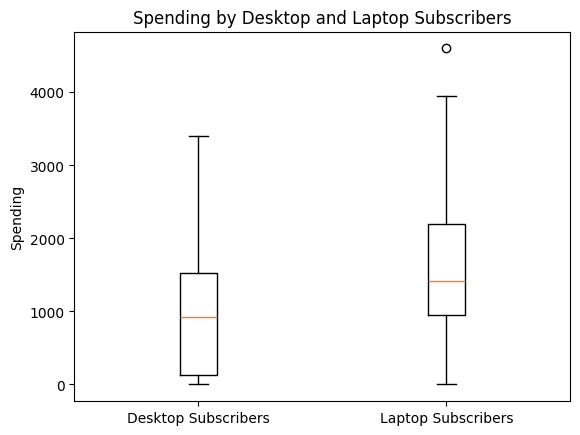

In [25]:

fig1, ax1 = plt.subplots()
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
plt.title("Spending by Desktop and Laptop Subscribers")
plt.xticks([1,2],['Desktop Subscribers', 'Laptop Subscribers'])
plt.ylabel('Spending')
plt.show()

In [26]:
desktop.describe()

,userid,spending,age,visits
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1028.666667,35.766667,210.800000
std,8.803408,907.411032,15.199100,311.468203
min,1.000000,0.000000,14.000000,5.000000
25%,8.250000,127.500000,25.500000,46.750000
50%,15.500000,925.000000,32.000000,100.000000
75%,22.750000,1528.250000,44.250000,145.000000
max,30.000000,3400.000000,79.000000,1256.000000


In [27]:
laptop.describe()

,userid,spending,age,visits
count,30.000000,30.000000,30.000000,30.000000
mean,45.500000,1624.566667,38.733333,193.900000
std,8.803408,1252.884222,17.104009,323.071611
min,31.000000,0.000000,16.000000,6.000000
25%,38.250000,957.500000,25.000000,39.250000
50%,45.500000,1419.500000,33.000000,77.500000
75%,52.750000,2199.750000,49.750000,126.000000
max,60.000000,4600.000000,79.000000,1250.000000


The results reveal that the mean desktop subscriber is about 35.8
years old, and the mean laptop subscriber is about 38.7 years old. We can
conclude that these groups are different, in the sense that they’re not identical.

But it’s not clear whether the groups are different enough that we should tell our marketing group to create two separate emails instead of one. To make that
judgment, we need to use our hypothesis-testing framework

**Hypothesis 0** The two email lists are random samples from the same population

**Hypothesis 1** The two email lists are not random samples from the same population

Hypothesis 0, our null hypothesis, is describing a world in which there’s a
population of people who are interested in computers, both laptops and desktops.

People from this population sign up for your company’s email lists occasionally.
But when they sign up for a list, they choose completely at random which of
your two lists they sign up for. In this world, your lists have superficial
differences, but they are truly two random samples from the same population and
don’t differ in any essential ways that would warrant different treatment by your company.

Hypothesis 1, the alternative hypothesis, describes a world in which the null
hypothesis is not true. This would mean that your subscribers’ membership on
different email lists is the result at least partially of underlying differences in people who like desktops and people who like laptops.

If Hypothesis 0 is true, it would be reasonable to send the same marketing email to both groups. If Hypothesis 1 is true, sending different marketing emails to each group makes more sense.

A business decision now depends on the result of a statistical test.
Let’s run our t-test and see whether our two subscriber groups actually differ
from each other. First, we should specify a significance level. Let’s use the 5
percent significance level that’s common in research.


In [28]:
scipy.stats.ttest_ind(desktop['spending'], laptop['spending'])

TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621095, df=58.0)

When you look at the results from our t-test, you can see that our p-value is
about 0.04. Since we use the common 5 percent significance level, this p-value is low enough for us to conclude that the desktop and laptop groups are not random draws from the same population, so we can reject the null hypothesis. It appears that desktop and laptop email subscribers are at least slightly different in a detectable way.
